In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
colors = ['dodgerblue','salmon','mediumseagreen']

# N=16

In [34]:
S2_PT_PIMC = [1.5960045888379566, 1.54947507115796, 1.5114973441872617, 1.4779953000826163, 1.4500695847280929, 1.4141344843249832, 1.3851820634166971, 1.354903714322663, 1.3269512793079887, 1.3055072738504876, 1.2764970901884967, 1.258901540029548, 1.248503554720116, 1.2413523182386694, 1.2361180678662742, 1.2335023882145186, 1.2311458266381654, 1.2298840389926078,1.227433198238352]
S2_PT_PIMC_err = [0.00035580316211303266, 0.0003329898567278955, 0.00034188122723691964, 0.00032638556053248474, 0.00033837595030027605, 0.00035201734672860865, 0.0003546192500934129, 0.00035334913695127897, 0.0003754566096056561, 0.00040550281492374873, 0.00042217093905799226, 0.0004532156744642555, 0.0005180271713738149, 0.0004897411776389725, 0.0005199884498706253, 0.0005499219417546537, 0.000606898890670794, 0.0006177650762991326,0.0006837228396847693]
# betas = [0.6,0.7,0.8,0.9,1.0,1.15,1.30,1.50,1.75,2.0,2.25,2.50,2.75,3.0,3.25,3.50,3.75,4.0,5.0]
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0,7.0]

S2_PT_exact = 1.226694406837E+00

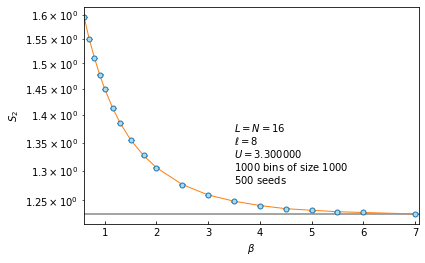

In [35]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,S2_PT_PIMC, yerr=S2_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,S2_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 16$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=8$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(S2_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingS2FullU3.3_N16_loglinear.pdf",dpi=400)
plt.savefig("betaScalingS2FullU3.3_N16_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [36]:
# Load PIMC estimates for various betas
S2_PT_PIMC = np.array(S2_PT_PIMC)
S2_PT_PIMC_err = np.array(S2_PT_PIMC_err)

In [37]:
# Compute relative errors
S2_PT_relErr = (np.abs(S2_PT_PIMC - S2_PT_exact)/S2_PT_exact)

In [38]:
# Compute the error propagation
S2_PT_PIMC_err_err = S2_PT_PIMC_err / S2_PT_exact

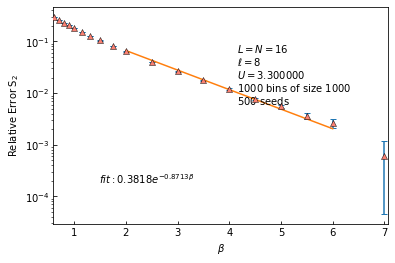

In [39]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],S2_PT_relErr[:], yerr=S2_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],S2_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 16$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=8$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $1000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[9:],np.log(S2_PT_relErr)[9:],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[9],6.0,1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsS2Full_N16_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsS2Full_N16_loglinear.png",dpi=400)
plt.show()

### Perform exponential fit

# N=8

In [21]:
S2_PT_PIMC = [1.2829,1.2442,1.213837068065992, 1.1884894510446489, 1.1671140313468096, 1.1421109306679664, 1.1223732428637725, 1.1032368942552557, 1.0857512150039967, 1.0743295424786865, 1.0611016363024728, 1.0544043861096373, 1.051414220903524, 1.0502711325999248, 1.0488990465557386, 1.0492084278259624, 1.0486293995685387, 1.048698738451736]
S2_PT_PIMC_err = [0.0001,0.0001,0.00010744552604166186, 0.00010109373182451963, 0.00011390646931166627, 0.00011080539009129002, 0.00011927945190665335, 0.00013266870300389244, 0.00013208173651861645, 0.00014626006028919874, 0.00015184246699518283, 0.00016750344137052522, 0.000272923388613794, 0.00018162894730002272, 0.0001922009221460402, 0.00019710222586297153, 0.0002130608212360392, 0.00022147260350017159]
betas = [0.6,0.7,0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

S2_PT_exact = 1.0487557642692404

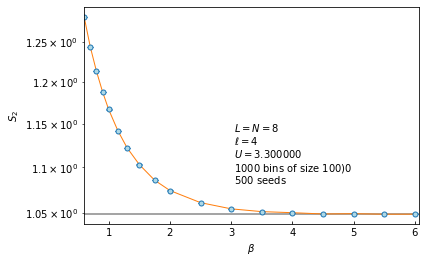

In [22]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,S2_PT_PIMC, yerr=S2_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,S2_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 8$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=4$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $100)0$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(S2_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingS2FullU3.3_N8_loglinear.pdf",dpi=400)
plt.savefig("betaScalingS2FullU3.3_N8_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [23]:
# Load PIMC estimates for various betas
S2_PT_PIMC = np.array(S2_PT_PIMC)
S2_PT_PIMC_err = np.array(S2_PT_PIMC_err)

In [24]:
# Compute relative errors
S2_PT_relErr = (np.abs(S2_PT_PIMC - S2_PT_exact)/S2_PT_exact)

In [25]:
# Compute the error propagation
S2_PT_PIMC_err_err = S2_PT_PIMC_err / S2_PT_exact

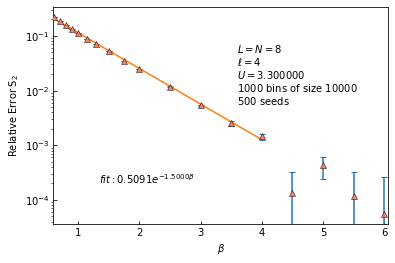

In [30]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],S2_PT_relErr[:], yerr=S2_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],S2_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 8$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=4$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[0:14],np.log(S2_PT_relErr)[0:14],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[0],betas[13],1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsS2Full_N8_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsS2Full_N8_loglinear.png",dpi=400)
plt.show()

In [27]:
betas[15]

5.0

In [88]:
betas[9]

3.0

# N=4

In [91]:
S2_PT_PIMC = [0.9898383457854535, 0.9596097645070981, 0.9374731795263943, 0.9192907726102002, 0.9058232007254574, 0.8905782259408983, 0.88110933190531, 0.8726014928673577, 0.8668273134876712, 0.8642093447220472, 0.8621035761038439, 0.861976603795701, 0.8615289133550588, 0.8618537270439901, 0.8619759233208428, 0.8617205867497898, 0.8613224105370141, 0.8620103099484949]
S2_PT_PIMC_err = [0.0001232707659469614, 0.00013272617754738253, 0.0001219042927764562, 0.00014047237177641263, 0.000130667006476304, 0.0001301836908921629, 0.00012688742904203652, 0.0001391633698939426, 0.00015332210424150443, 0.00016021712774790258, 0.00016933816845978033, 0.000184801022611753, 0.00019694338502543017, 0.00021959622403852397, 0.0002145587538665704, 0.00022721691462344165, 0.00023398850111704217, 0.000247333520376461]
betas = [0.6, 0.7, 0.8, 0.9, 1.0, 1.15, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
S2_PT_exact = 0.861757259131563

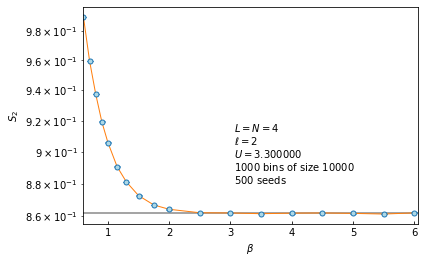

In [92]:
fig,ax1 = plt.subplots()
ax1.errorbar(betas,S2_PT_PIMC, yerr=S2_PT_PIMC_err, fmt='.', capsize=3,ms=10,mfc='lightblue');
ax1.plot(betas,S2_PT_PIMC,lw=1)
ax1.set_ylabel(r'$S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 4$",(0.55,0.50),xycoords='figure fraction')
ax1.annotate(r"$\ell=2$",(0.55,0.45),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.55,0.40),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.55,0.30),xycoords='figure fraction')
ax1.axhline(S2_PT_exact,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.tick_params(direction="in")
ax1.set_yscale("log")
plt.savefig("betaScalingS2FullU3.3_N4_loglinear.pdf",dpi=400)
plt.savefig("betaScalingS2FullU3.3_N4_loglinear.png",dpi=400)
plt.plot();

# Relative Errors vs $\beta$

In [93]:
# Load PIMC estimates for various betas
S2_PT_PIMC = np.array(S2_PT_PIMC)
S2_PT_PIMC_err = np.array(S2_PT_PIMC_err)

In [94]:
# Compute relative errors
S2_PT_relErr = (np.abs(S2_PT_PIMC - S2_PT_exact)/S2_PT_exact)

In [95]:
# Compute the error propagation
S2_PT_PIMC_err_err = S2_PT_PIMC_err / S2_PT_exact

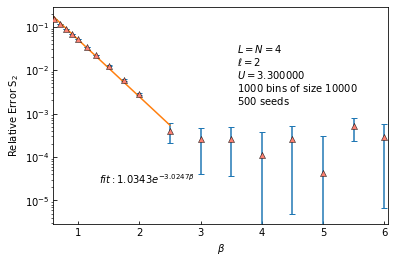

In [102]:
fig,ax1 = plt.subplots()

ax1.errorbar(betas[:],S2_PT_relErr[:], yerr=S2_PT_PIMC_err_err[:], fmt='.', capsize=3,ms=0)
ax1.scatter(betas[:],S2_PT_relErr[:],marker='^',lw=0.47,label=r'$U=3.3$',color=colors[1],ec='black',zorder=10)

ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; S_2$')
ax1.set_xlabel(r'$\beta$')
ax1.annotate(r"$L = N = 4$",(0.60,0.50+.30),xycoords='figure fraction')
ax1.annotate(r"$\ell=2$",(0.60,0.45+.30),xycoords='figure fraction')
ax1.annotate(r"$U=3.300000$",(0.60,0.40+.30),xycoords='figure fraction')
ax1.annotate(r"$1000$ bins of size $10000$",(0.60,0.35+.30),xycoords='figure fraction')
ax1.annotate(r"$500$ seeds",(0.60,0.30+.30),xycoords='figure fraction')
ax1.axhline(0,color="#888888",zorder=-1)
ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
ax1.set_yscale("log")
ax1.tick_params(direction='in')

# Perform linear fit to ln(y) vs x:
m,lnB = np.polyfit(betas[0:11],np.log(S2_PT_relErr)[0:11],deg=1)
B = np.exp(lnB)

betas_fit = np.linspace(betas[0],betas[10],1000)
ax1.plot(betas_fit,B*np.exp(m*betas_fit))
ax1.annotate(r"$fit: %.4f e^{%.4f \beta}$"%(B,m),(0.25,0.30+.0),xycoords='figure fraction')

plt.savefig("relativeErrorsS2Full_N4_loglinear.pdf",dpi=400)
plt.savefig("relativeErrorsS2Full_N4_loglinear.png",dpi=400)
plt.show()

In [23]:
betas[9:]

[2.0, 3.0, 4.0]